##### Latar Belakang
DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience-nya sehingga tidak akan ditinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitor. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Oleh karena itu, tim Data Scientist diminta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

### Tugas dan Langkah
Sebagai seorang data scientist, kamu diminta untuk menyiapkan data sebelum dilakukan permodelan.

Pada tugas kali ini, kamu akan melakukan Data Preprocessing (Data Cleansing) bulan lalu, yakni Juni 2020.

Langkah yang akan dilakukan adalah,
<ol>
    <li>Mencari ID pelanggan (Nomor telepon) yang valid</li>
    <li>Mengatasi data-data yang masih kosong (Missing Values)</li>
    <li>Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable</li>
    <li>Menstandardisasi Nilai dari Variable</li>
<ol>

### Library yang Digunakan
Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data.
<ol>
    <li>Pandas
        <p>Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.</p>
        <ul>
            <li>read_csv() digunakan untuk membaca file csv</li>
            <li>str.match() digunakan untuk mencocokan dengan karakter tertentu</li>
            <li>drop() digunakan untuk menghapus</li>
            <li>count() digunakan untuk menghitung masing-masing variable</li>
            <li>drop_duplicates() digunakan untuk menghapus data duplicate rows</li>
            <li>fillna() digunakan untuk mengisi dengan nilai tertentu</li>
            <li>quantile() digunakan untuk melihat quantile ke tertentu</li>
            <li>mask() mengganti nilai tertentu jika kondisi memenuhi</li>
            <li>astype() mengubah tipe data</li>
            <li>value_counts() digunakan untuk menghitung unik dari kolom</li>
            <li>sort_values() digunakan untuk sort values</li>
            <li>isnull() digunakan untuk mendeteksi missing values</li>
            <li>dropna() digunakan untuk menghapus missing values</li>
            <li>replace() digunakan untuk mengganti nilai</li>
        </ul>
    </li>    
    <li>Matplotlib
        <p>Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.</p>
        <ul>
            <li>figure() digunakan untuk membuat figure gambar baru</li>
        </ul>
    </li>
    <li>Seaborn
        <p>Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.</p>
        <ul>
            <li>box_plot() digunakan untuk membuat box plot</li>
        </ul>
    </li>
</ol>

### Data yang Digunakan
Untuk dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

 
Untuk detail datanya adalah sebagai berikut:
<ul>
    <li>UpdatedAt Periode of Data taken</li>
    <li>customerID Customer ID</li>
    <li>gender Whether the customer is a male or a female (Male, Female)</li>
    <li>SeniorCitizen Whether the customer is a senior citizen or not (1, 0)</li>
    <li>Partner Whether the customer has a partner or not (Yes, No)</li>
    <li>Dependents Whether the customer has dependents or not (Yes, No)</li>
    <li>tenure Number of months the customer has stayed with the company</li>
    <li>PhoneService Whether the customer has a phone service or not (Yes, No)</li>
    <li>MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)</li>
    <li>InternetService Customer’s internet service provider (DSL, Fiber optic, No)</li>
    <li>OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)</li>
    <li>OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)</li>
    <li>DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)</li>
    <li>TechSupport Whether the customer has tech support or not (Yes, No, No internet service)</li>
    <li>StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)</li>
    <li>StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)</li>
    <li>Contract The contract term of the customer (Month-to-month, One year, Two year)</li>
    <li>PaperlessBilling Whether the customer has paperless billing or not (Yes, No)</li>
    <li>PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</li>
    <li>MonthlyCharges The amount charged to the customer monthly</li>
    <li>TotalCharges The total amount charged to the customer</li>
    <li>Churn Whether the customer churned or not (Yes or No)</li>
<ul>

### Import Library dan Dataset

In [2]:
#import library
import pandas as pd

pd.options.display.max_columns = 50

#import dataset
df_load = pd.read_csv('../../../Dataset/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

(7113, 22)


In [2]:
#Tampilkan 5 data teratas
df_load.head(5)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Jumlah ID yang unik
print(df_load.customerID.nunique())

7017


### Memfilter ID Number Pelanggan Format Tertentu
Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:
<ul>
    <li>Panjang karakter adalah 11-12.</li>
    <li>Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka</li>
    <li>Diawali dengan angka 45 2 digit pertama.</li>
<ul>

In [4]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(
    r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1)
print('Hasil jumlah ID Customer yang terfilter adalah',
      df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


### Memfilter Duplikasi ID Number Pelanggan
Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:
<ul>
    <li>Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya</li>
    <li>Duplikasi dikarenakan inserting beda periode pengambilan data</li>
</ul>

In [5]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt',
                              ascending=False).drop_duplicates(['customerID'])
print(
    'Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',
    df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


### Kesimpulan
Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

### Mengatasi Missing Values dengan Penghapusan Rows
Selanjutnya kita akan menghapus rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak. Diasumsikan data modeller hanya mau menerima data yang benar ada flag churn-nya atau tidak.

In [6]:
print('Total missing values data dari kolom Churn',
      df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows dan Kolom Data setelah dihapus data Missing Values adalah ',
      df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan Kolom Data setelah dihapus data Missing Values adalah  (6950, 22)


### Mengatasi Missing Values dengan Pengisian Nilai tertentu
Selain dengan menghapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:
<ul>
    <li>Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan di isi dengan 11.</li>
    <li>Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.</li>
</ul>
Tentukan:
<ul>
    <li>Apakah masih ada data yang missing values</li>
    <li>Jumlah missing values dari masing-masing variable</li>
    <li>Tangani missing values-nya</li>
</ul>

In [7]:
print('Status Missing Values :', df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges', 'TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('\nJumlah missing values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

Jumlah missing values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneServic

### Kesimpulan
Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (outlier)

### Mendeteksi adanya Outlier (Boxplot)
Mendeteksi pencilan dari suatu nilai (outlier) salah satunya bisa melihat plot dari data tersebut menggunakan boxplot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

![image.png]
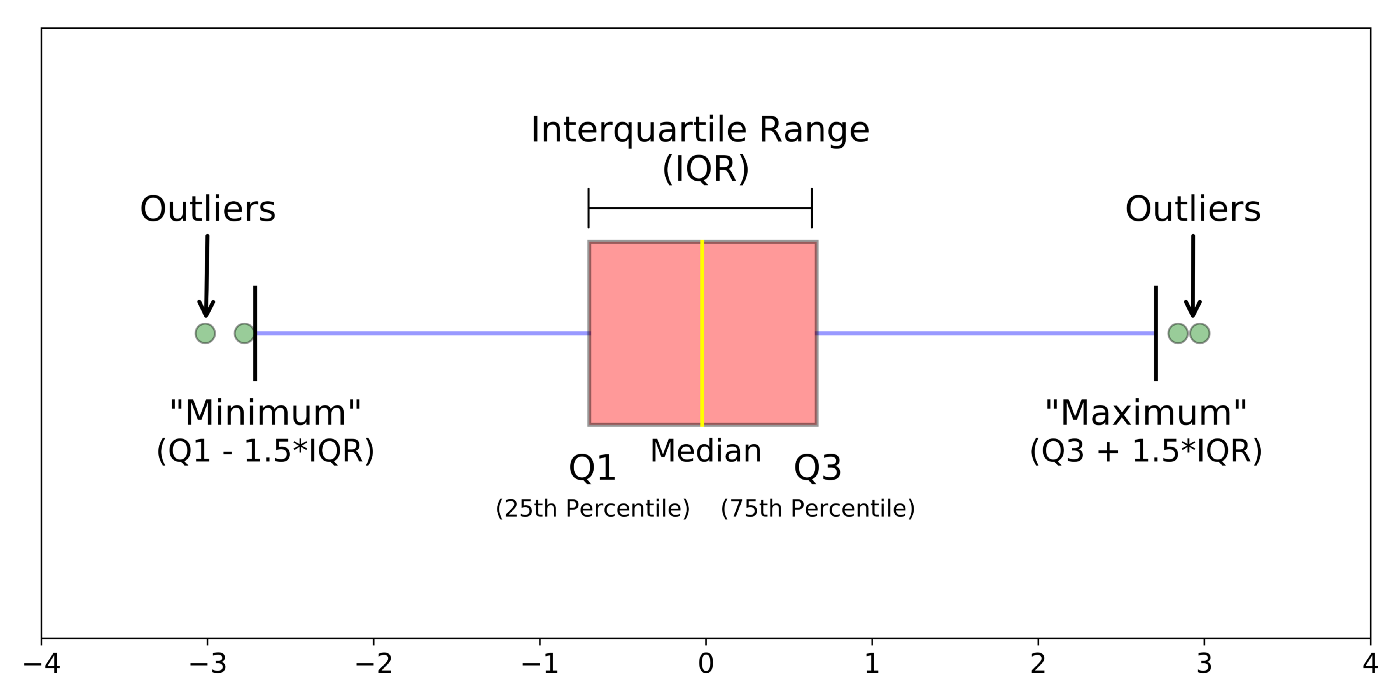

In [8]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


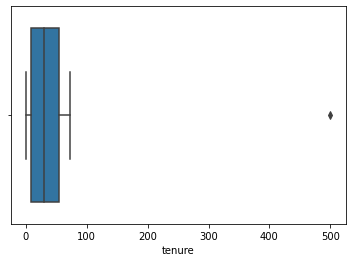

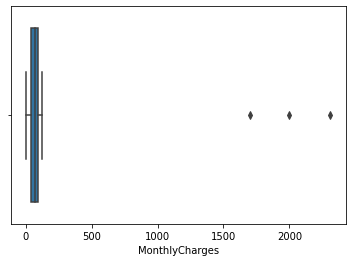

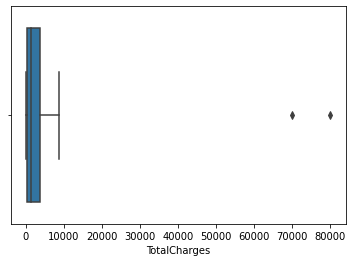

In [9]:
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()  # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()  # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### Mengatasi Outlier
Setelah kita mengetahui variable mana saja yang terdapat pencilan (outlier), selanjutnya kita akan atasi outlier dengan menggunakan metode interquartile range (IQR). Untuk detail jelasnya, bisa dilihat di ilustrasi di bawah ini:

In [10]:
# Handling with IQR
Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
print('Nilai Maximum dari masing-masing Variable adalah:')
print(maximum)
minimum = Q1 - (1.5 * IQR)
print('\nNilai Minimum dari masing-masing Variable adalah:')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier:')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


C:\Users\numbe\AppData\Local\Temp/ipykernel_7520/1442858778.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
C:\Users\numbe\AppData\Local\Temp/ipykernel_7520/1442858778.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)



Persebaran data setelah ditangani Outlier:
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


### Kesimpulan
Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.

### Mendeteksi Nilai yang tidak Standar
Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

In [11]:
#Loop
for col_name in list([
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]):
    print(
        '\nUnique Values Count \033[1m' +
        'Before Standardized \033[0m Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

### Menstandarisasi Variable Kategorik
Setelah kita mengeteahui variable mana saja yang ada nilai tidak standard, maka kita standardkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah. Gunakan fungsi replace() untuk menstandardkan nilai.

In [13]:
df_load = df_load.replace(['Wanita', 'Laki-Laki', 'Churn', 'Iya'],
                          ['Female', 'Male', 'Yes', 'Yes'])

#Loop
for col_name in list(['gender', 'Dependents', 'Churn']):
    print(
        '\nUnique Values Count \033[1m' + 'After Standardized\033[0m Variable',
        col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


### Kesimpulan
Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:

Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Setelah kita standardkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value-nya.